<div class="alert alert-block alert-success">

## <center> Tracking Issues created for Repos on GitHub </center>
## <center> Plot and Forecast Issues </center>
    

</div>

<div class="alert alert-block alert-danger">
    
### Deliverables: 
- Submit a single ZIP file  that has the folowing items:
    1. Your PDF document for the analysis report. 
    2. Your IPYNB script with the name GitHub_Repos_Issues_Forecasting.ipynb that has your source code and output for the requirements listed 
    2. Your HTML/PDF document that has your source code and output for the requirements listed 

<br>
    
</div>

<hr style="border:2px solid black"> </hr>
<div class="alert alert-info">



        
## REQUIREMENT 1

Use Python/GitHub API to retrieve Issues/Repos information of the **past 2 months** for the following  repositories:
- https://github.com/meta-llama/llama3
- https://github.com/ollama/ollama
- https://github.com/langchain-ai/langchain
- https://github.com/langchain-ai/langgraph
- https://github.com/microsoft/autogen
- https://github.com/openai/openai-cookbook 
- https://github.com/elastic/elasticsearch 
- https://github.com/milvus-io/pymilvus 


## Important: Data Retrieval Timeframe

 - For **chart visualizations below**, retrieve **past 2 years** of data.
 - For **semantic search and vector embeddings**, use **past 2 months** of data from the above repositories.

    
</div>



In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
import requests
from datetime import datetime, timedelta, timezone
import time

repos = [
    "meta-llama/llama3",
    "ollama/ollama",
    "langchain-ai/langchain",
    "langchain-ai/langgraph",
    "microsoft/autogen",
    "openai/openai-cookbook",
    "elastic/elasticsearch",
    "milvus-io/pymilvus"
]

now = datetime.today()
since_2_months = (now - timedelta(days=60)).isoformat() + "Z"
since_2_years = (now - timedelta(days=730)).isoformat() + "Z"

GITHUB_TOKEN = ""
headers = {"Authorization": f"token {GITHUB_TOKEN}"} if GITHUB_TOKEN else {}

def fetch_issues(repo, since, label):
    print(f"Fetching {label} issues from: {repo}")
    all_issues = []
    page = 1
    while True:
        url = f"https://api.github.com/repos/{repo}/issues"
        params = {
            "state": "all",
            "since": since,
            "per_page": 100,
            "page": page
        }
        response = requests.get(url, headers=headers, params=params)
        
        if response.status_code != 200:
            print(f"Error fetching {repo}: {response.status_code}")
            break
        
        data = response.json()
        if not data:
            break
        for issue in data:
            is_pr = "pull_request" in issue
            all_issues.append({
                "repo": repo,
                "id": issue["id"],
                "number": issue["number"],
                "title": issue["title"],
                "state": issue["state"],
                "created_at": issue["created_at"],
                "closed_at": issue["closed_at"],
                "pull_request": is_pr
            })
        page += 1
        time.sleep(1)  # avoid rate limit
    return all_issues

### Retrieve **past 2 years** of data.

In [ ]:
issues_2_years = []

for repo in repos:
    issues_2_years += fetch_issues(repo, since_2_years, "2-year")

df_2_years = pd.DataFrame(issues_2_years)
df_2_years.to_csv("issues_last_2_months.csv", index=False)

print("==== Done ====")
print(f"Total:{len(df_2_years)}")

### Retrieve **past 2 months** of data.

In [44]:
issues_2_months = []

for repo in repos:
    issues_2_months += fetch_issues(repo, since_2_months, "2-month")

df_2_months = pd.DataFrame(issues_2_months)
df_2_months.to_csv("issues_last_2_months.csv", index=False)

print("==== Done ====")
print(f"Total:{len(df_2_months)}")


Fetching 2-month issues from: meta-llama/llama3
Fetching 2-month issues from: ollama/ollama
Fetching 2-month issues from: langchain-ai/langchain
Fetching 2-month issues from: langchain-ai/langgraph
Fetching 2-month issues from: microsoft/autogen
Fetching 2-month issues from: openai/openai-cookbook
Fetching 2-month issues from: elastic/elasticsearch
Fetching 2-month issues from: milvus-io/pymilvus
==== Done ====
Total:3932


Add a function to make a strict filter: make sure the data only created in 2 months/yesrs

In [140]:
from datetime import timezone

def filter_recent_issues(df: pd.DataFrame, days: int = 60, mode: str = "created_only") -> pd.DataFrame:
    # Format
    df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
    df["closed_at"] = pd.to_datetime(df["closed_at"], utc=True)

    # Strict filter
    cutoff_date = datetime.now(timezone.utc) - timedelta(days=days)

    if mode == "created_only":
        df = df[df["created_at"] >= cutoff_date]
    elif mode == "created_or_closed":
        df = df[
            (df["created_at"] >= cutoff_date) |
            (df["closed_at"] >= cutoff_date)
        ]
    else:
        raise ValueError(f"Unsupported mode: {mode}")

    # remove timezone and warning
    df["created_at"] = df["created_at"].dt.tz_localize(None)
    df["closed_at"] = df["closed_at"].dt.tz_localize(None)

    return df

<hr style="border:1px solid black"> </hr>

<div class="alert alert-info">   
    
## REQUIREMENT 2
- A line chart to plot the issues for every repository
    
</div>


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["created_at"] = df["created_at"].dt.tz_localize(None)
/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["closed_at"] = df["closed_at"].dt.tz_localize(None)


<Figure size 640x480 with 0 Axes>

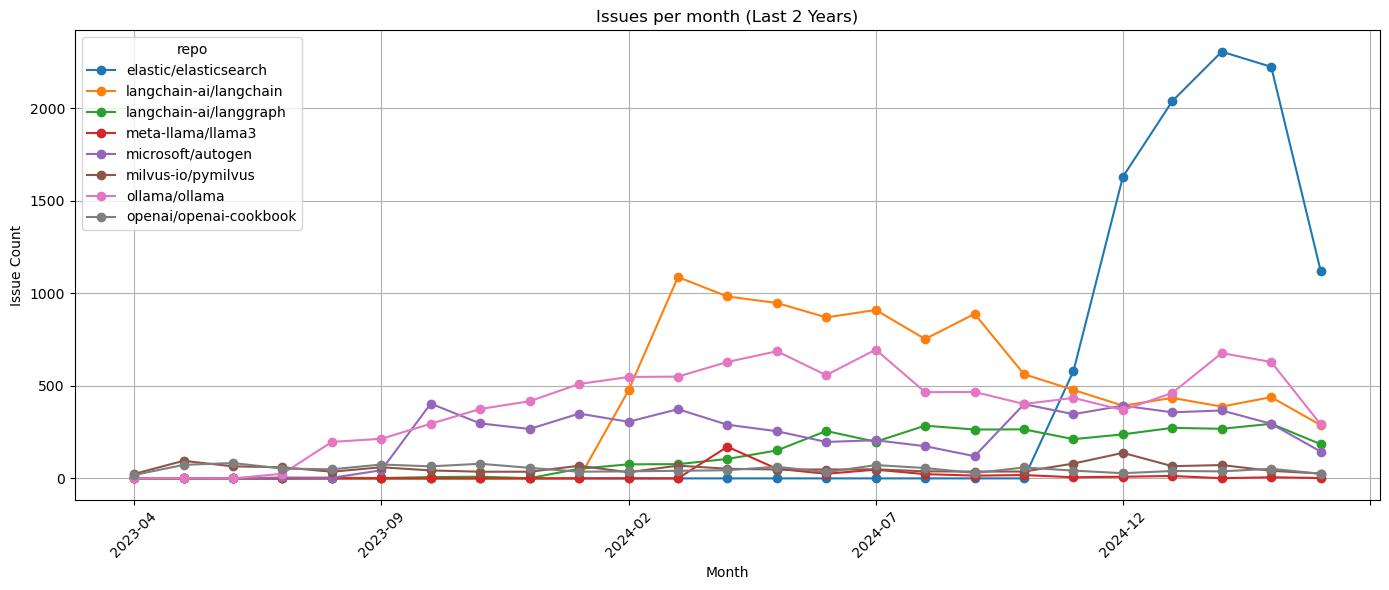

In [144]:
#Add your code for requirement 2 in this cell

df = pd.read_csv("issues_last_2_years.csv")
df = filter_recent_issues(df, days=730, mode="created_only")

# group by month
df["month"] = df["created_at"].dt.to_period("M").astype(str)
monthly_df = df.groupby(["repo", "month"]).size().reset_index(name="issue_count")

# pivot
pivot_df = monthly_df.pivot(index="month", columns="repo", values="issue_count").fillna(0)

plt.figure()
pivot_df.plot(kind="line", marker="o", figsize=(14, 6))
plt.title("Issues per month (Last 2 Years)")
plt.xlabel("Month")
plt.ylabel("Issue Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<hr style="border:1px solid black"> </hr>

<div class="alert alert-info">   
    
## REQUIREMENT 3
- A bar chart to plot the issues created for every month for every repository
    
</div>

/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["created_at"] = df["created_at"].dt.tz_localize(None)
/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["closed_at"] = df["closed_at"].dt.tz_localize(None)


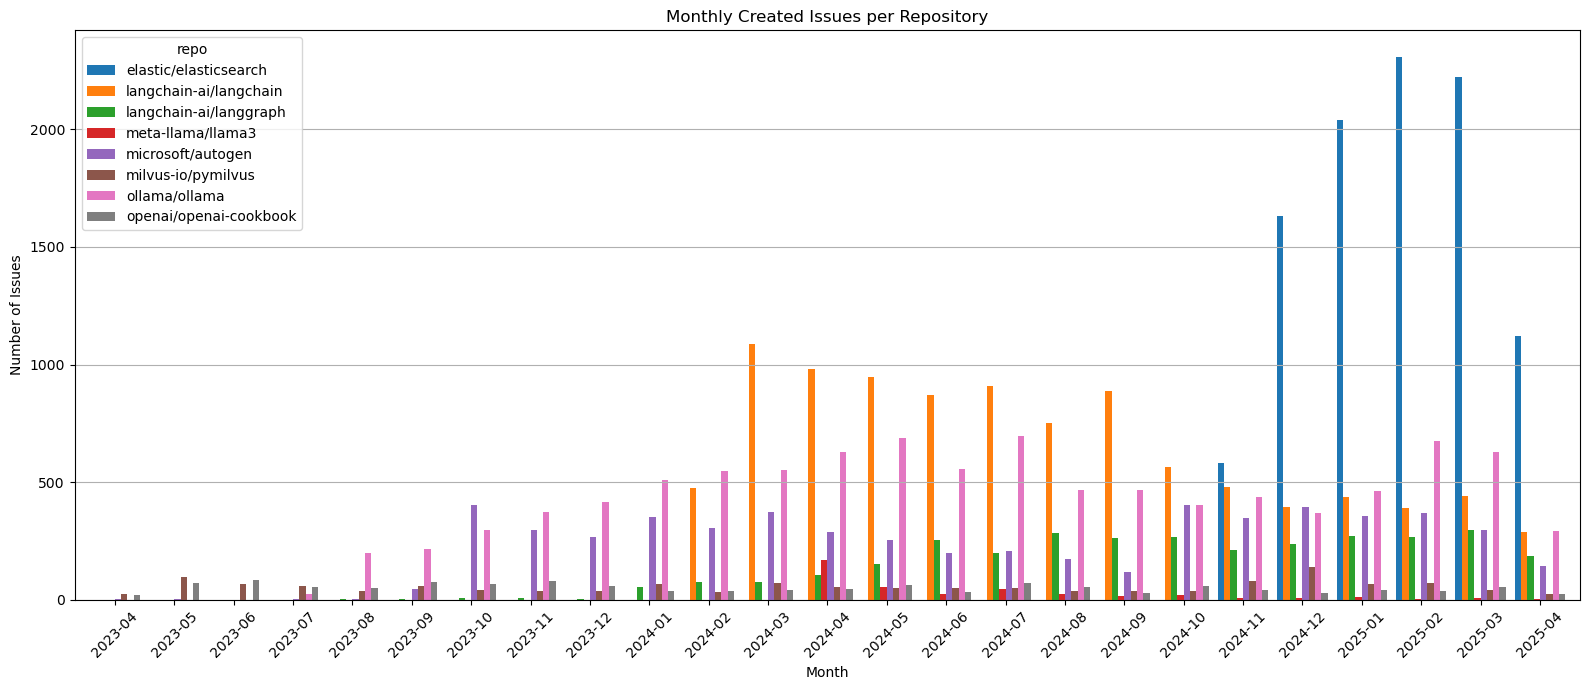

In [145]:
#Add your code for requirement 3 in this cell

df = pd.read_csv("issues_last_2_years.csv")
df = filter_recent_issues(df, days=730, mode="created_only")

# group by month
df["month"] = df["created_at"].dt.to_period("M").astype(str)
monthly_df = df.groupby(["repo", "month"]).size().reset_index(name="issue_count")

# pivot
pivot_df = monthly_df.pivot(index="month", columns="repo", values="issue_count").fillna(0)

pivot_df.plot(kind="bar", figsize=(16, 7), width=0.85)
plt.title("Monthly Created Issues per Repository")
plt.xlabel("Month")
plt.ylabel("Number of Issues")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y")
plt.show()


<hr style="border:1px solid black"> </hr>
<div class="alert alert-info">   
    
## REQUIREMENT 4
- A bar chart to plot the starts for every repository
    
</div>

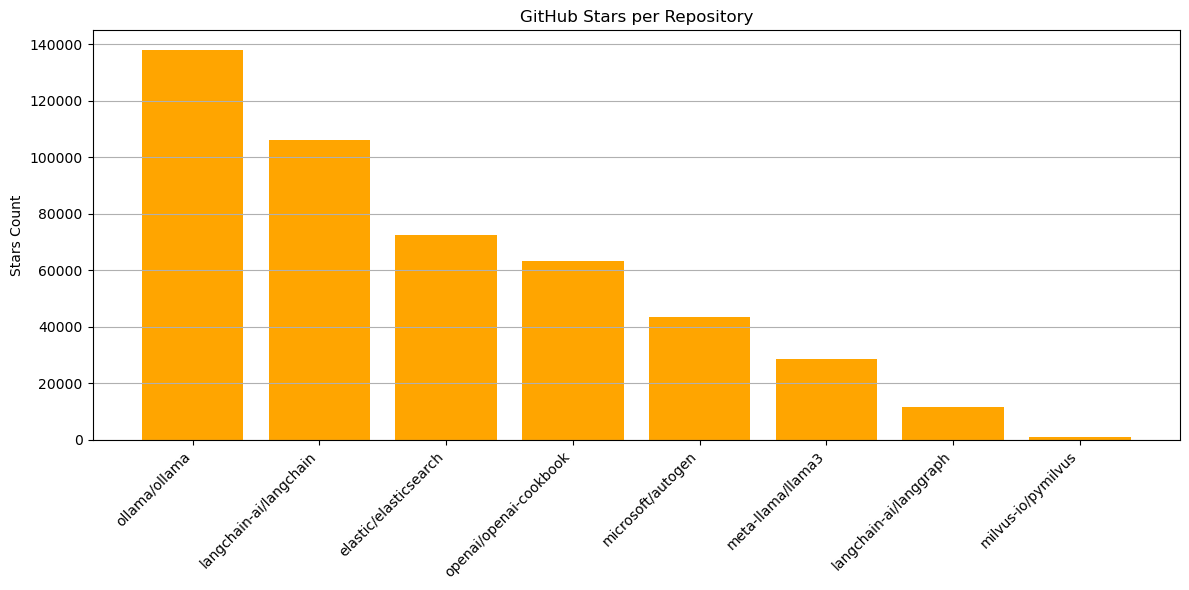

In [47]:
stars_data = {}
for repo in repos:
    url = f"https://api.github.com/repos/{repo}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        stars_data[repo] = response.json().get("stargazers_count", 0)
    else:
        print(f"Error fetching {repo}: {response.status_code}")
        stars_data[repo] = None

# sort
sorted_data = dict(sorted(stars_data.items(), key=lambda item: item[1], reverse=True))

# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_data.keys(), sorted_data.values(), color='orange')
plt.title("GitHub Stars per Repository")
plt.ylabel("Stars Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<hr style="border:1px solid black"> </hr>
<div class="alert alert-info">   
    
## REQUIREMENT 5
- A bar chart to plot the forks for every repository
    
</div>

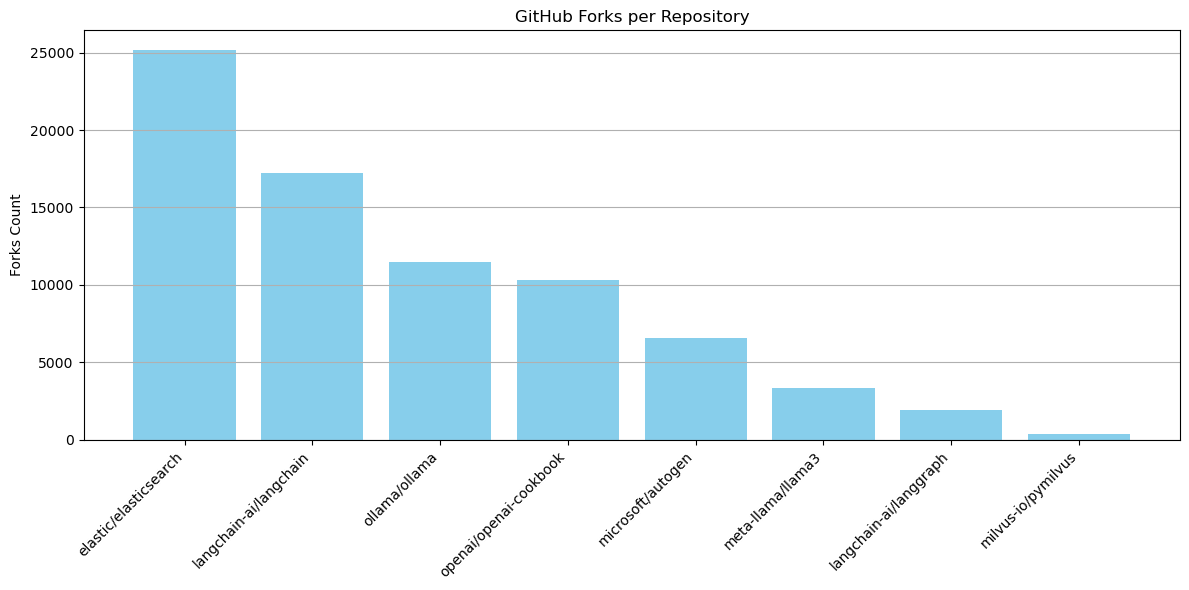

In [ ]:
#Add your code for requirement 5 in this cell

forks_data = {}
for repo in repos:
    url = f"https://api.github.com/repos/{repo}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        forks_data[repo] = data["forks_count"]
    else:
        print(f"Error fetching {repo}: {response.status_code}")
        forks_data[repo] = None

# sort
sorted_forks = dict(sorted(forks_data.items(), key=lambda item: item[1], reverse=True))

# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_forks.keys(), sorted_forks.values(), color="skyblue")
plt.title("Repo Forks Count")
plt.ylabel("Forks Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<hr style="border:1px solid black"> </hr>
<div class="alert alert-info">   
    
## REQUIREMENT 6
- A bar chart to plot the issues closed for every week for every repository
    
</div>

/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["created_at"] = df["created_at"].dt.tz_localize(None)
/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["closed_at"] = df["closed_at"].dt.tz_localize(None)


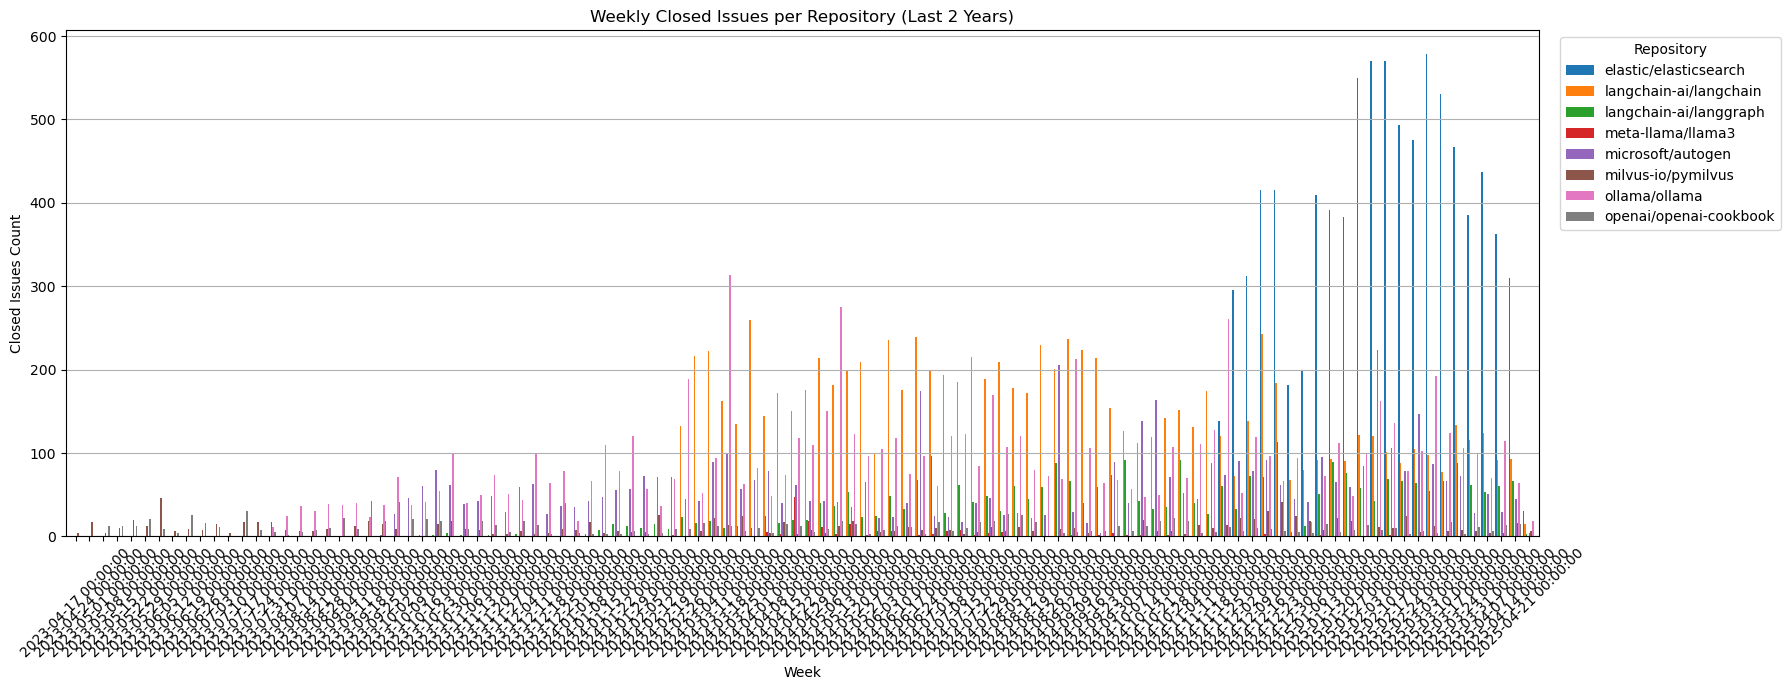

In [ ]:
#Add your code for requirement 6 in this cell

df = pd.read_csv("issues_last_2_years.csv")
df = filter_recent_issues(df, days=730, mode="created_only")
df["repo"] = df["repo"].astype(str)

# use close at
closed_df = df.dropna(subset=["closed_at"]).copy()

# group by week
closed_df["week"] = closed_df["closed_at"].dt.to_period("W").apply(lambda r: r.start_time)
weekly_closed_df = closed_df.groupby(["week", "repo"]).size().reset_index(name="closed_count")

# Pivot 
pivot_df = weekly_closed_df.pivot(index="week", columns="repo", values="closed_count").fillna(0)

# bar chart
pivot_df.plot(kind="bar", stacked=False, figsize=(18, 7), width=0.9)
plt.title("Weekly Closed Issues per Repository (Last 2 Years)")
plt.xlabel("Week")
plt.ylabel("Closed Issues Count")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend(title="Repository", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

<hr style="border:1px solid black"> </hr>
<div class="alert alert-info">   
    
## REQUIREMENT 7
- A stack-bar Chart to plot the created and closed issues for every repository
    
</div>

/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["created_at"] = df["created_at"].dt.tz_localize(None)
/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3903001296.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["closed_at"] = df["closed_at"].dt.tz_localize(None)


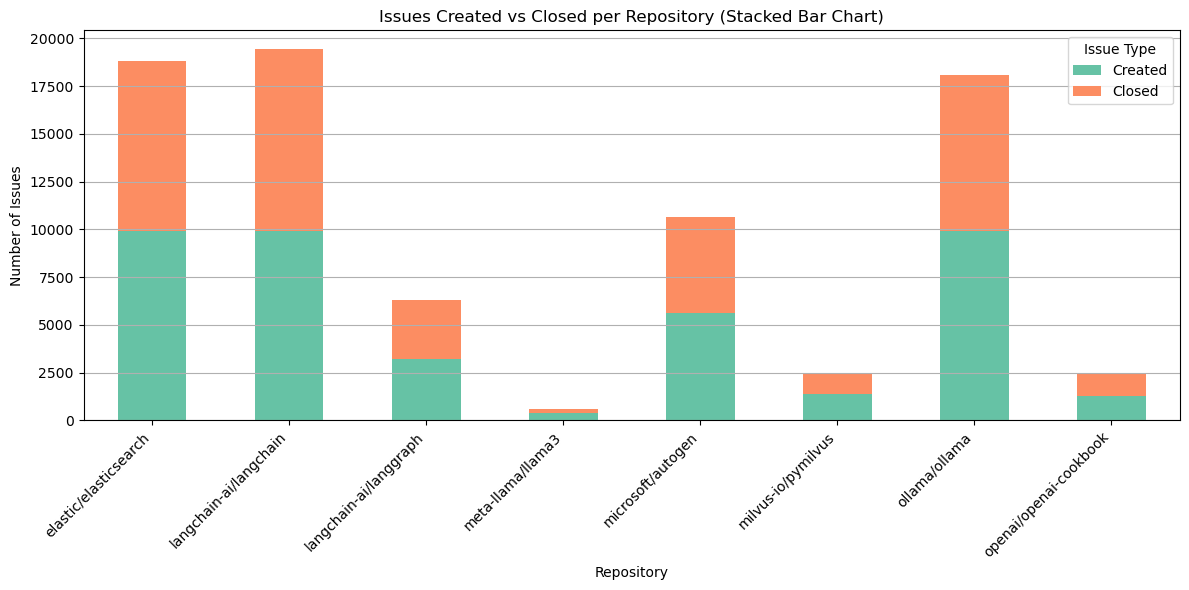

In [156]:
#Add your code for requirement 7 in this cell

df = pd.read_csv("issues_last_2_years.csv")
df = filter_recent_issues(df, days=730, mode="created_only")
df["repo"] = df["repo"].astype(str)


# get created and closed 
created_counts = df.groupby("repo")["created_at"].count()
closed_counts = df["closed_at"].notna().groupby(df["repo"]).sum()

# merge to one DataFrame
summary_df = pd.DataFrame({
    "Created": created_counts,
    "Closed": closed_counts
})

summary_df.plot(kind="bar", stacked=True, figsize=(12, 6), color=["#66c2a5", "#fc8d62"])
plt.title("Issues Created vs Closed per Repository (Stacked Bar Chart)")
plt.xlabel("Repository")
plt.ylabel("Number of Issues")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Issue Type")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<hr style="border:1px solid black"> </hr>
<div class="alert alert-info">   
    
## REQUIREMENT 8 (TENSORFLOW/KERAS LSTM)
- Use TensorFlow/Keras LSTM package to forecast the following for every repository  
</div>

<div class="alert alert-block alert-success">   
    
#### REQ8-1). The day of the week maximum number of issues created 
    
</div>

In [ ]:
!pip install tensorflow

In [52]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

repo: meta-llama/llama3


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Sunday


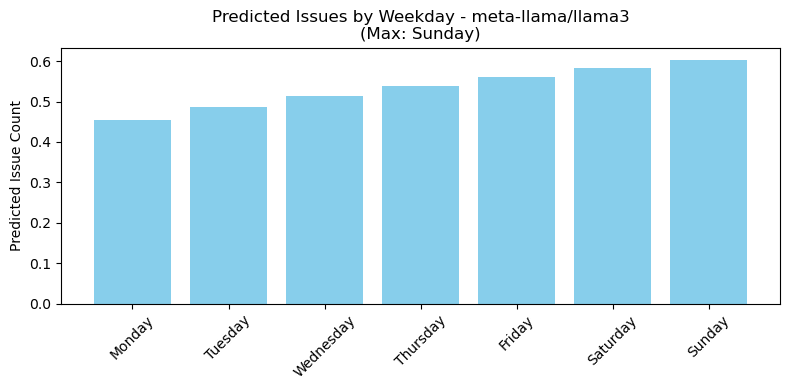

repo: ollama/ollama


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Sunday


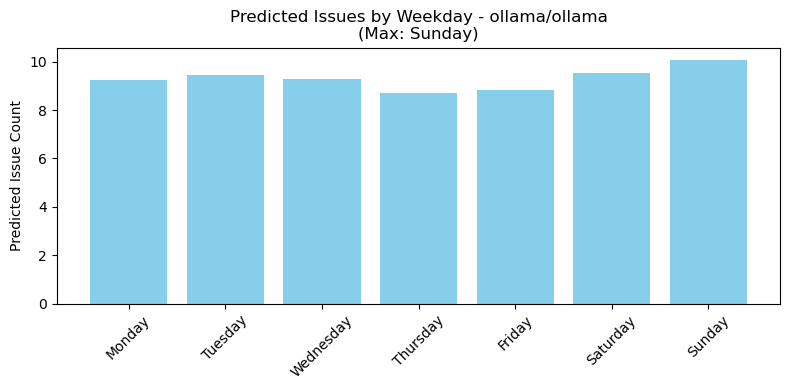

repo: langchain-ai/langchain


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Sunday


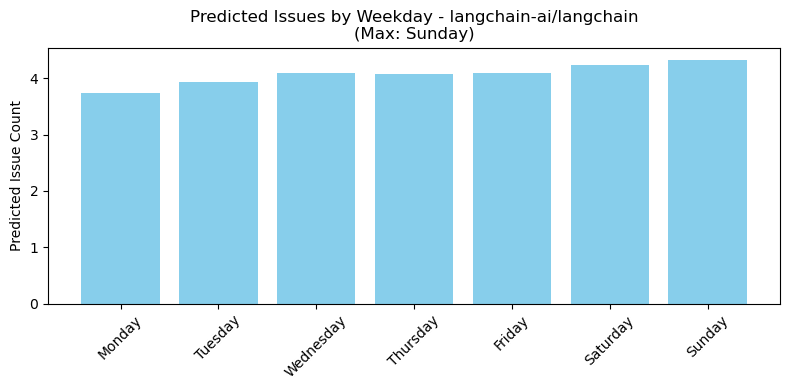

repo: langchain-ai/langgraph


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Tuesday


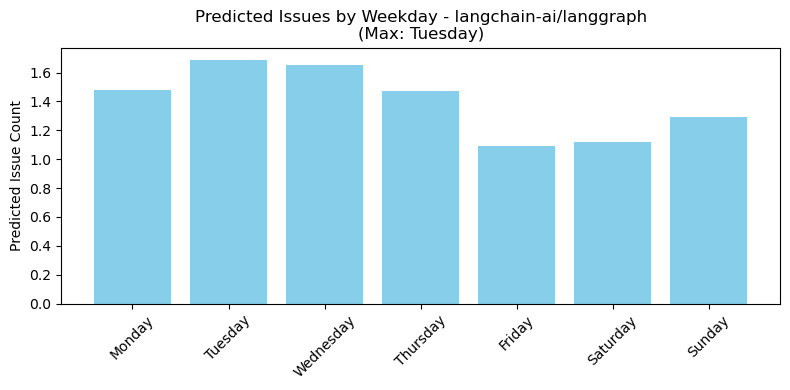

repo: microsoft/autogen


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Friday


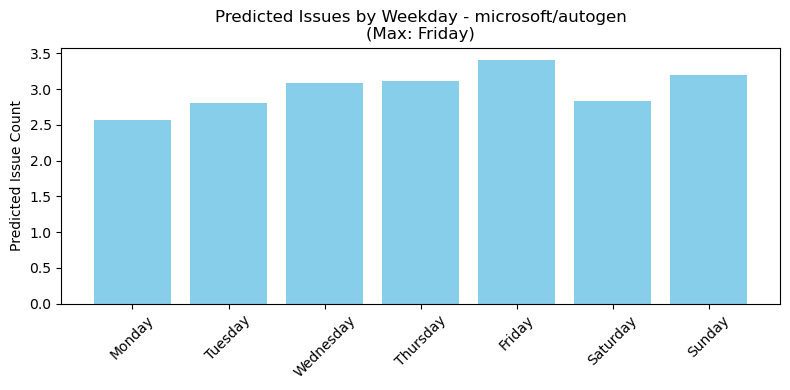

repo: openai/openai-cookbook


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Tuesday


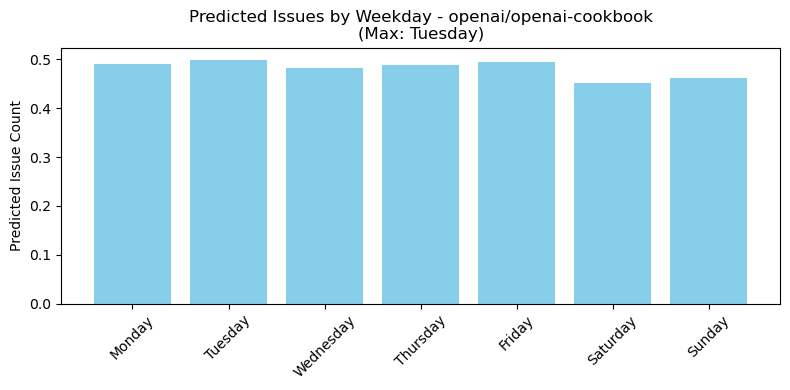

repo: elastic/elasticsearch


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Tuesday


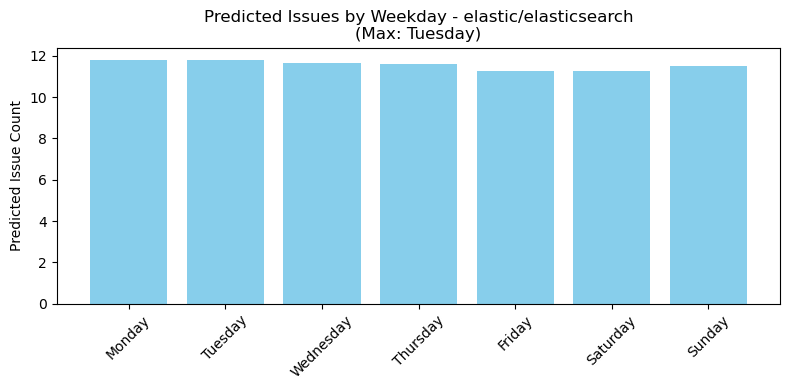

repo: milvus-io/pymilvus


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The day of the week maximum number of issues created ：Tuesday


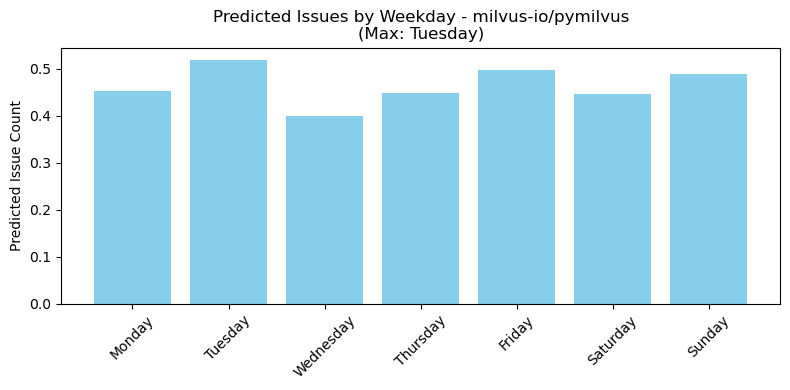

In [ ]:
#Add your code for requirement 8.1 in this cell

df = pd.read_csv("issues_last_2_months.csv")
df["created_at"] = pd.to_datetime(df["created_at"])

repo_names = df["repo"].unique()

for repo in repo_names:
    print(f"repo: {repo}")
    
    repo_df = df[df["repo"] == repo]
    daily_issues = repo_df.groupby(repo_df["created_at"].dt.date).size()
    daily_issues = daily_issues.reindex(pd.date_range(daily_issues.index.min(), daily_issues.index.max()), fill_value=0)
    daily_issues.index.name = "date"
    
    # Normalization
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily_issues.values.reshape(-1, 1))

    # Using LSTM to predict which day of the week will have the most issues created,
    # based on 2 years of daily issue data with a 7-day sliding window.
    X, y = [], []
    lookback = 7
    for i in range(lookback, len(scaled)):
        X.append(scaled[i - lookback:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)

    # model
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=10, verbose=0)

    # predict next week
    input_seq = scaled[-lookback:]
    predictions = []
    current_input = input_seq.reshape(1, lookback, 1)

    for _ in range(7):
        pred = model.predict(current_input, verbose=0)[0][0]
        predictions.append(pred)
        current_input = np.append(current_input[:, 1:, :], [[[pred]]], axis=1)

    # inverse normalization
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    max_day = days[np.argmax(predictions)]

    # result
    print(f"The day of the week maximum number of issues created ：{max_day}")
    plt.figure(figsize=(8, 4))
    plt.bar(days, predictions, color='skyblue')
    plt.title(f"Predicted Issues by Weekday - {repo}\n(Max: {max_day})")
    plt.ylabel("Predicted Issue Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<div class="alert alert-block alert-success">   
    
#### REQ8-2). The day of the week maximum number of issues closed 

</div>

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv("issues_last_2_months.csv")
df["closed_at"] = pd.to_datetime(df["closed_at"])
df["repo"] = df["repo"].astype(str)

repo_names = df["repo"].unique()

Predicting weekly closed issues for: meta-llama/llama3


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


meta-llama/llama3: Most likely to close the most issues on ➤ Sunday


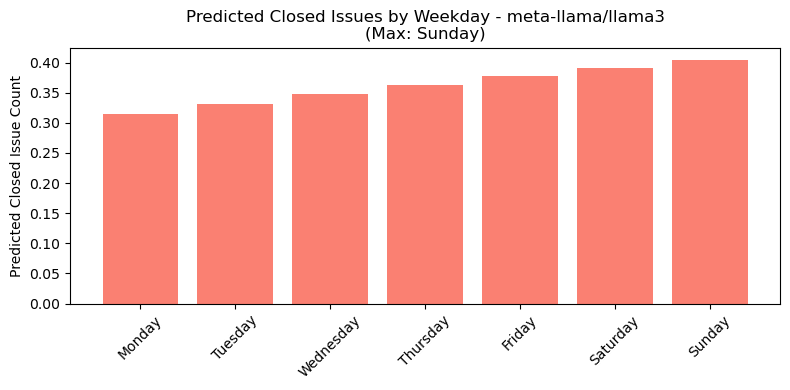

Predicting weekly closed issues for: ollama/ollama


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ollama/ollama: Most likely to close the most issues on ➤ Sunday


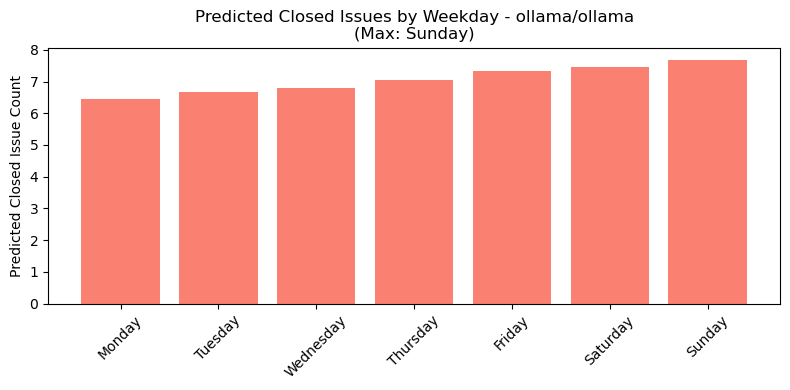

Predicting weekly closed issues for: langchain-ai/langchain


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


langchain-ai/langchain: Most likely to close the most issues on ➤ Sunday


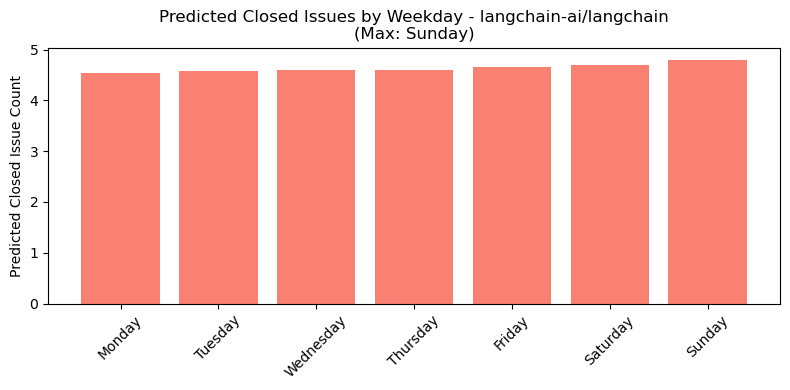

Predicting weekly closed issues for: langchain-ai/langgraph


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


langchain-ai/langgraph: Most likely to close the most issues on ➤ Monday


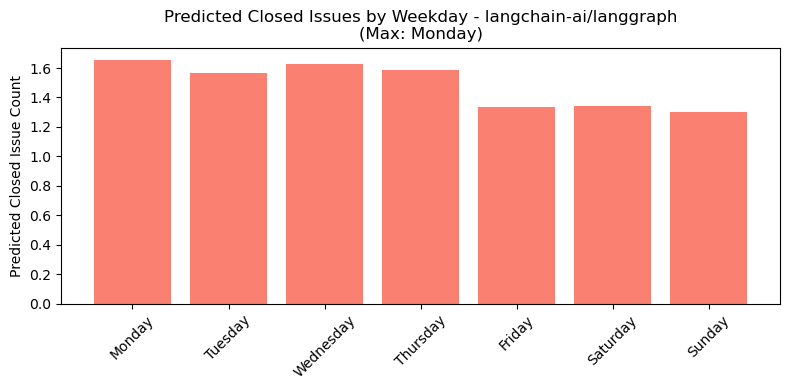

Predicting weekly closed issues for: microsoft/autogen


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


microsoft/autogen: Most likely to close the most issues on ➤ Saturday


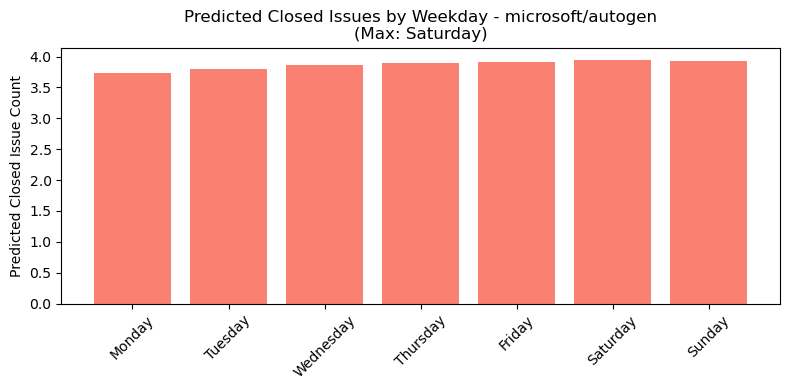

Predicting weekly closed issues for: openai/openai-cookbook


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


openai/openai-cookbook: Most likely to close the most issues on ➤ Saturday


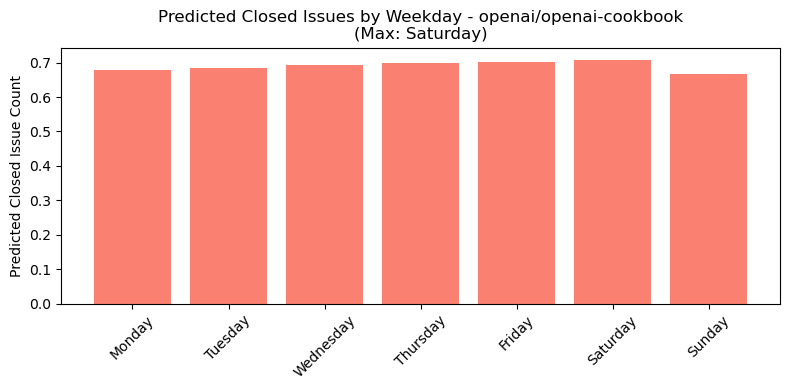

Predicting weekly closed issues for: elastic/elasticsearch


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


elastic/elasticsearch: Most likely to close the most issues on ➤ Friday


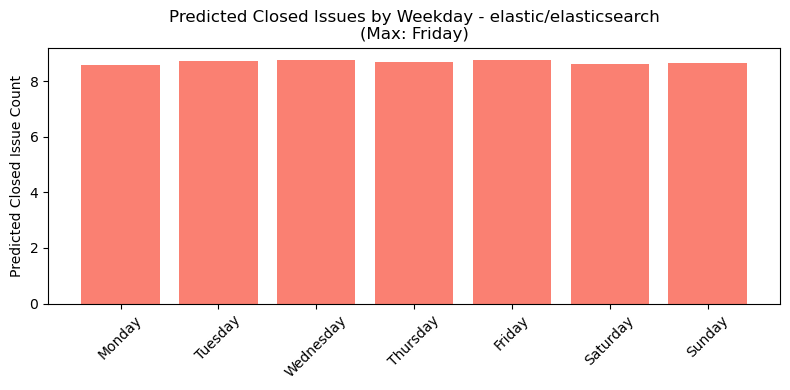

Predicting weekly closed issues for: milvus-io/pymilvus


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


milvus-io/pymilvus: Most likely to close the most issues on ➤ Sunday


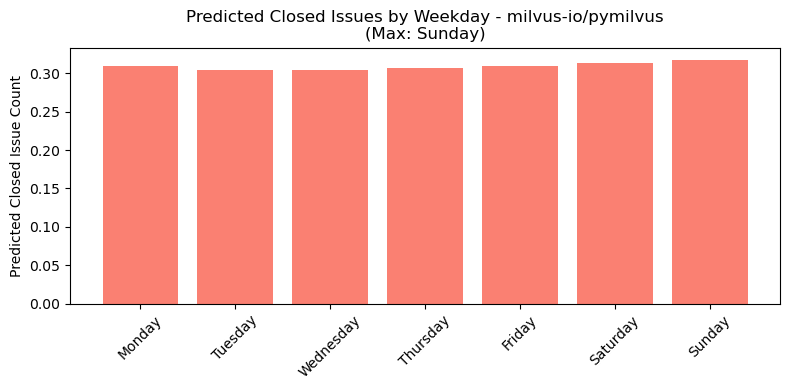

In [114]:
#Add your code for requirement 8.2 in this cell

def lstm_forecast_closed(daily_closed):
    # normalization
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily_closed.values.reshape(-1, 1))
    
    lookback = 7
    X, y = [], []
    for i in range(lookback, len(scaled)):
        X.append(scaled[i - lookback:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)
    
    # LSTM
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=10, verbose=0)
    
    # next 7 days
    input_seq = scaled[-lookback:]
    predictions = []
    current_input = input_seq.reshape(1, lookback, 1)
    
    for _ in range(7):
        pred = model.predict(current_input, verbose=0)[0][0]
        predictions.append(pred)
        current_input = np.append(current_input[:, 1:, :], [[[pred]]], axis=1)
    
    # inverse normalization
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()


weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for repo in repo_names:
    print(f"Predicting weekly closed issues for: {repo}")
    
    # repo's daily closed count
    repo_df = df[(df["repo"] == repo) & (df["closed_at"].notna())]
    daily_closed = repo_df.groupby(repo_df["closed_at"].dt.date).size()
    daily_closed = daily_closed.reindex(
        pd.date_range(daily_closed.index.min(), daily_closed.index.max()), fill_value=0
    )
    
    # predict
    predictions = lstm_forecast_closed(daily_closed)
    max_day = weekdays[np.argmax(predictions)]
    
    print(f"{repo}: Most likely to close the most issues on ➤ {max_day}")

    plt.figure(figsize=(8, 4))
    plt.bar(weekdays, predictions, color='salmon')
    plt.title(f"Predicted Closed Issues by Weekday - {repo}\n(Max: {max_day})")
    plt.ylabel("Predicted Closed Issue Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<div class="alert alert-block alert-success">   
    
#### REQ8-3). The month of the year that has maximum number of issues closed 


</div>


🔮 Forecasting monthly closed issues for: meta-llama/llama3


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ meta-llama/llama3 → Month with most closed issues: March


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


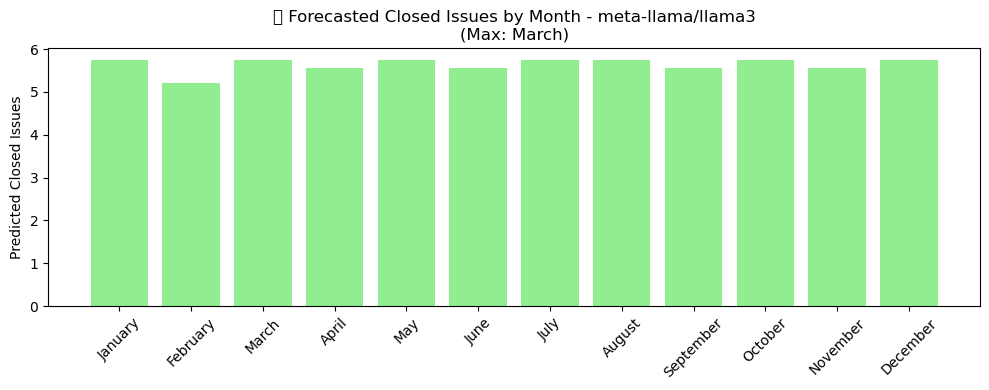


🔮 Forecasting monthly closed issues for: ollama/ollama


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ ollama/ollama → Month with most closed issues: January


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


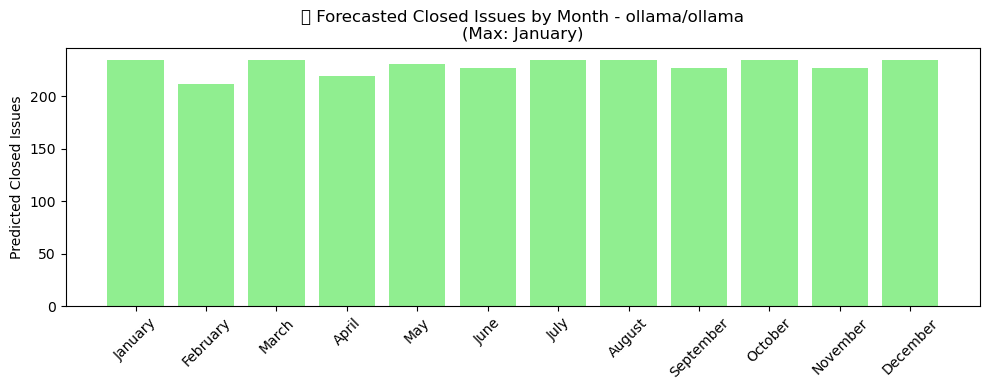


🔮 Forecasting monthly closed issues for: langchain-ai/langchain


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ langchain-ai/langchain → Month with most closed issues: March


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


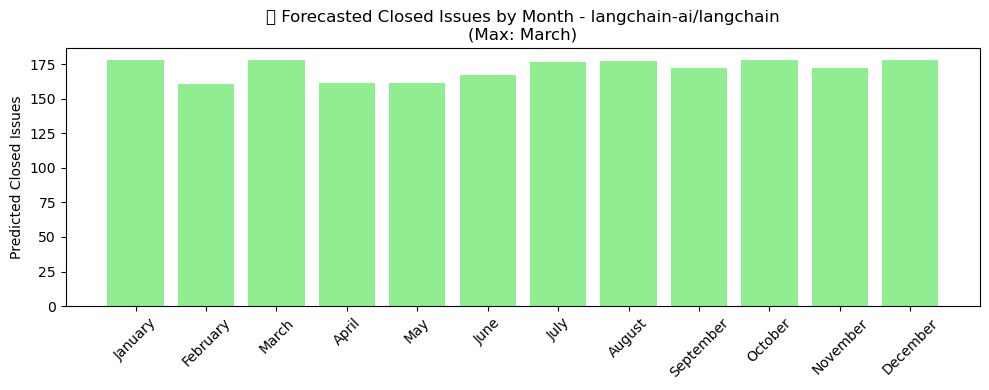


🔮 Forecasting monthly closed issues for: langchain-ai/langgraph


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ langchain-ai/langgraph → Month with most closed issues: April


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


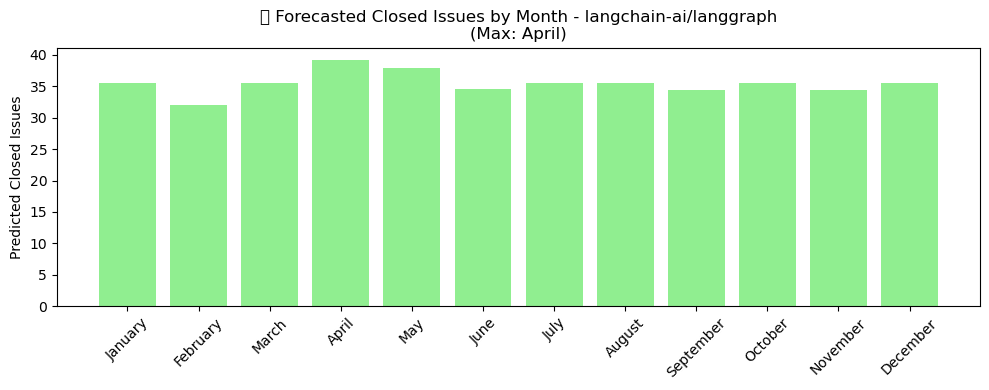


🔮 Forecasting monthly closed issues for: microsoft/autogen


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ microsoft/autogen → Month with most closed issues: January


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


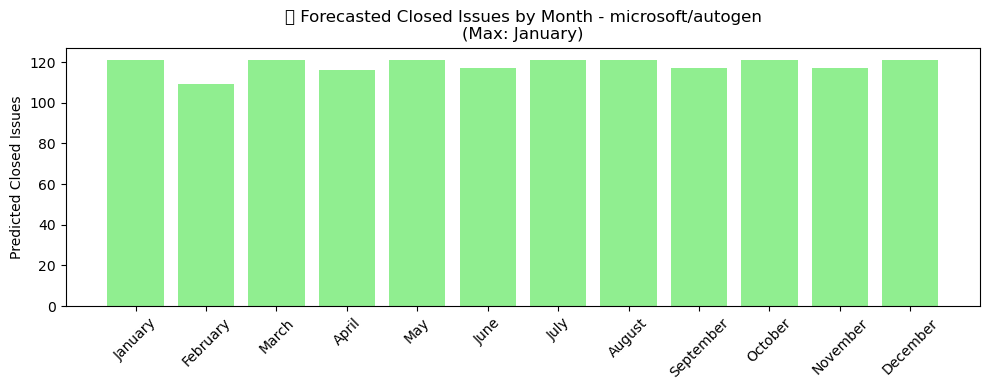


🔮 Forecasting monthly closed issues for: openai/openai-cookbook


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ openai/openai-cookbook → Month with most closed issues: April


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


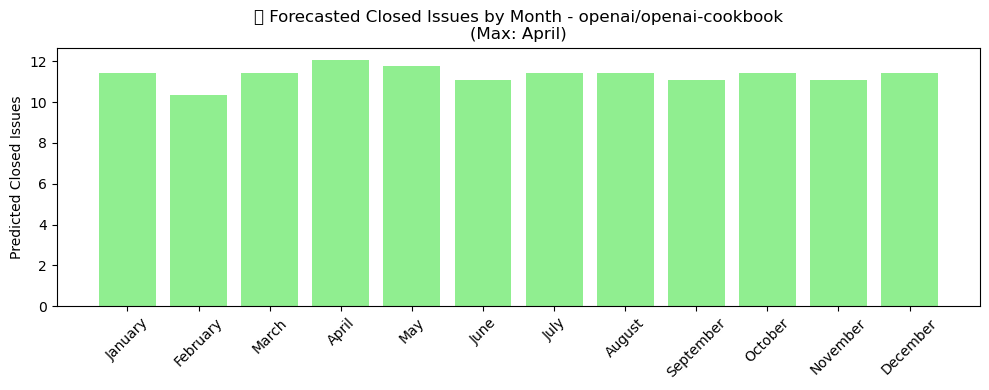


🔮 Forecasting monthly closed issues for: elastic/elasticsearch


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ elastic/elasticsearch → Month with most closed issues: January


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


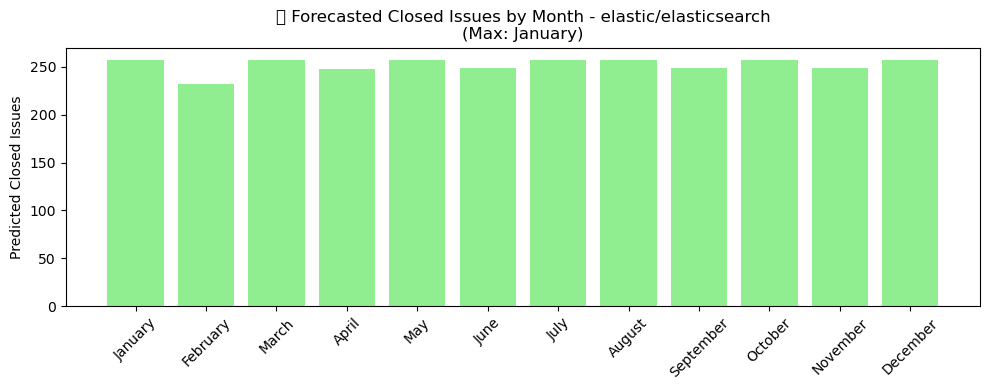


🔮 Forecasting monthly closed issues for: milvus-io/pymilvus


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ milvus-io/pymilvus → Month with most closed issues: April


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/1389930889.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


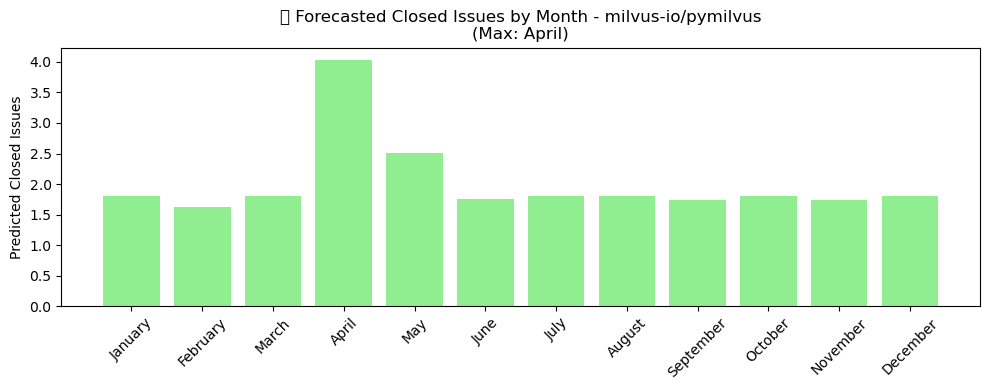

In [115]:
#Add your code for requirement 8.3 in this cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

# Load & prepare data
df = pd.read_csv("issues_last_2_months.csv")
df["closed_at"] = pd.to_datetime(df["closed_at"])
df = df[df["closed_at"].notna()]
df["repo"] = df["repo"].astype(str)

# Get repo list
repo_names = df["repo"].unique()

for repo in repo_names:
    print(f"\n Forecasting monthly closed issues for: {repo}")
    
    # Get daily closed counts
    repo_df = df[df["repo"] == repo]
    daily_closed = repo_df.groupby(df["closed_at"].dt.date).size()
    daily_closed = daily_closed.reindex(
        pd.date_range(daily_closed.index.min(), daily_closed.index.max()), fill_value=0
    )
    daily_closed.index.name = "date"
    
    # Normalize
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily_closed.values.reshape(-1, 1))

    # Build training data
    lookback = 30
    X, y = [], []
    for i in range(lookback, len(scaled)):
        X.append(scaled[i - lookback:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)

    # LSTM model
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=10, verbose=0)

    # Predict next 365 days
    input_seq = scaled[-lookback:]
    predictions = []
    current_input = input_seq.reshape(1, lookback, 1)

    for _ in range(365):
        pred = model.predict(current_input, verbose=0)[0][0]
        predictions.append(pred)
        current_input = np.append(current_input[:, 1:, :], [[[pred]]], axis=1)

    # Inverse transform
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Create date range and group by month
    future_dates = pd.date_range(daily_closed.index[-1] + timedelta(days=1), periods=365)
    future_df = pd.DataFrame({"date": future_dates, "pred": predictions})
    future_df["month"] = future_df["date"].dt.month_name()
    monthly_sum = future_df.groupby("month")["pred"].sum()

    # 對齊月份順序
    monthly_sum = monthly_sum.reindex([
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ])

    max_month = monthly_sum.idxmax()

    # 結果輸出
    print(f"{repo} → Month with most closed issues: {max_month}")

    # 畫圖
    plt.figure(figsize=(10, 4))
    plt.bar(monthly_sum.index, monthly_sum.values, color='lightgreen')
    plt.title(f"Forecasted Closed Issues by Month - {repo}\n(Max: {max_month})")
    plt.ylabel("Predicted Closed Issues")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success">   
    
#### REQ8-4). Plot the created issues forecast 

</div>


🔮 Forecasting created issues for: meta-llama/llama3


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


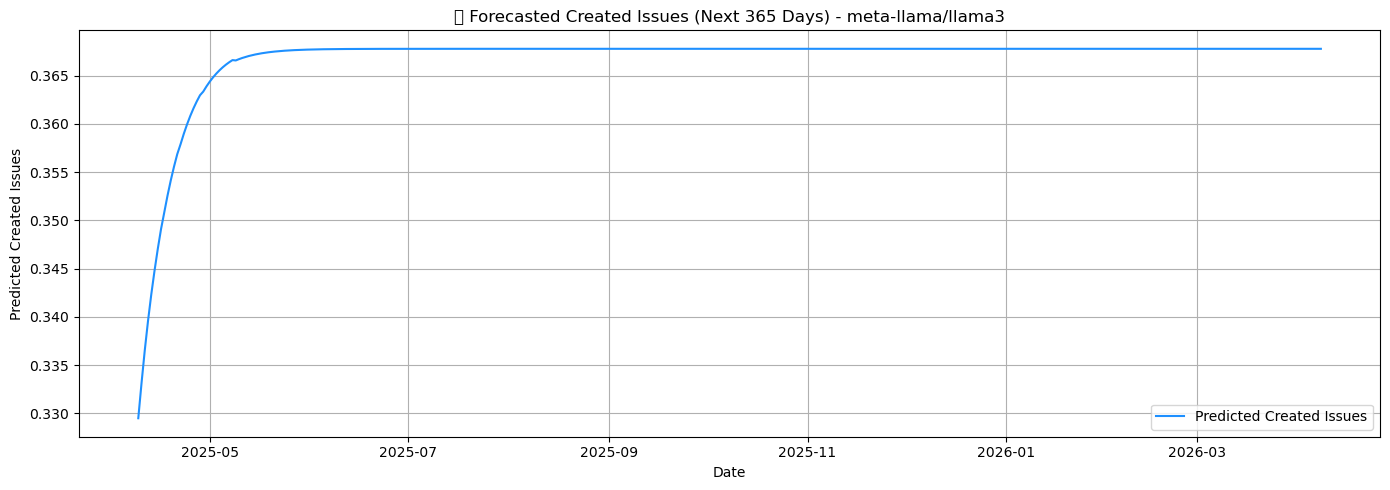

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting created issues for: ollama/ollama


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


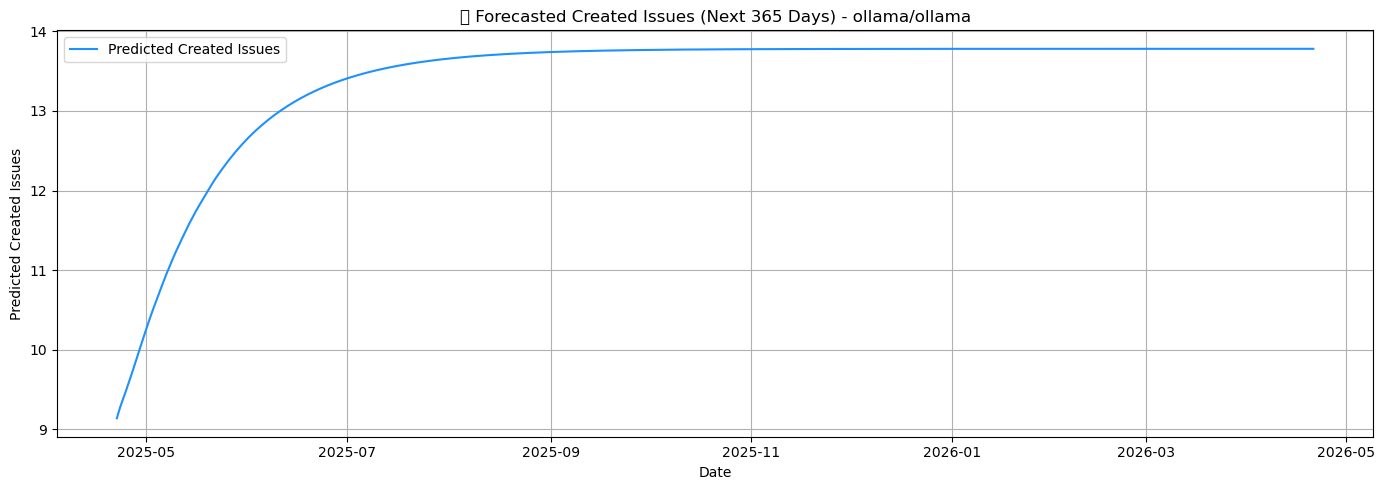

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting created issues for: langchain-ai/langchain


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


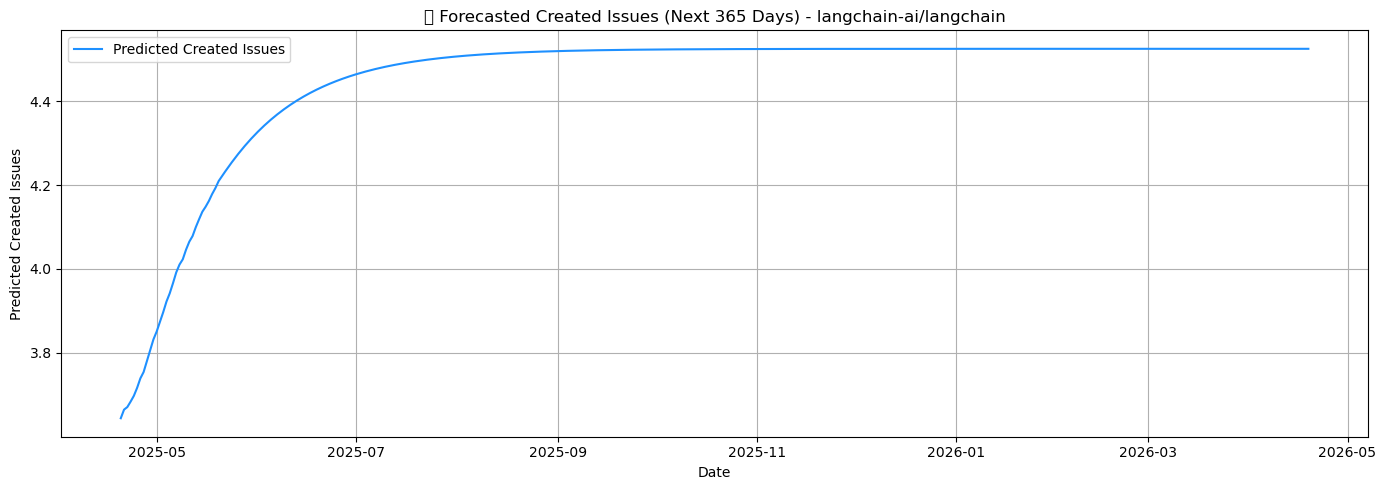

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting created issues for: langchain-ai/langgraph


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


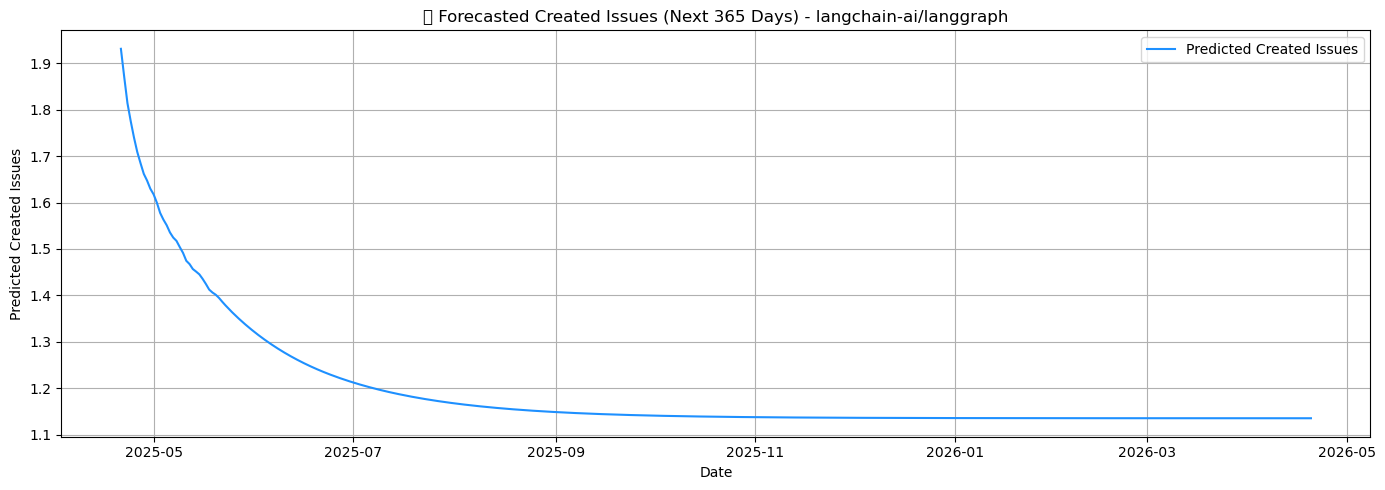

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting created issues for: microsoft/autogen


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


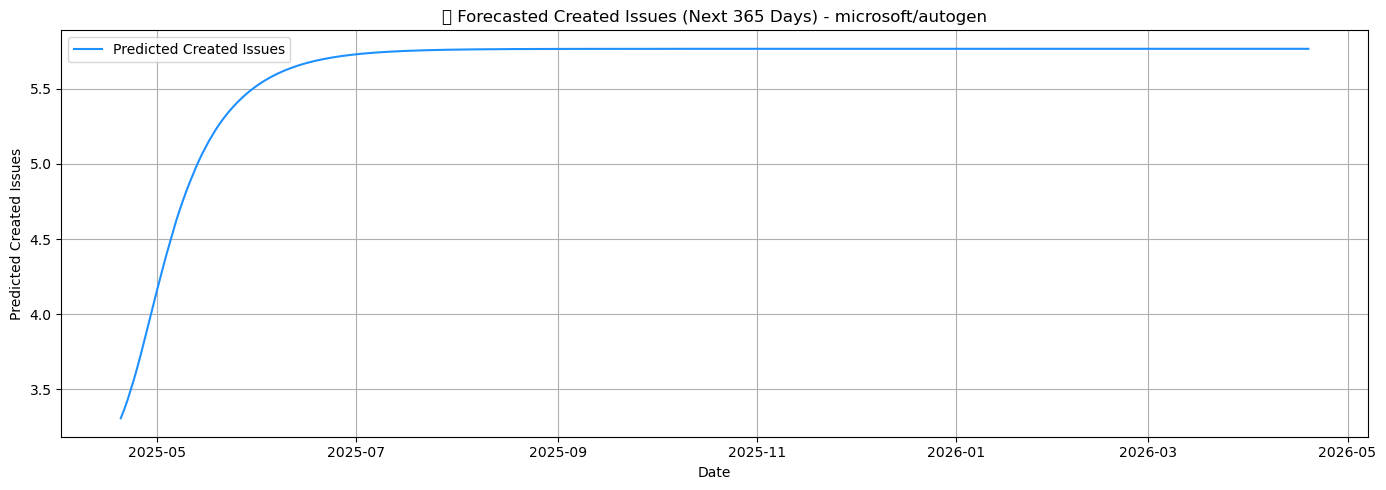

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting created issues for: openai/openai-cookbook


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


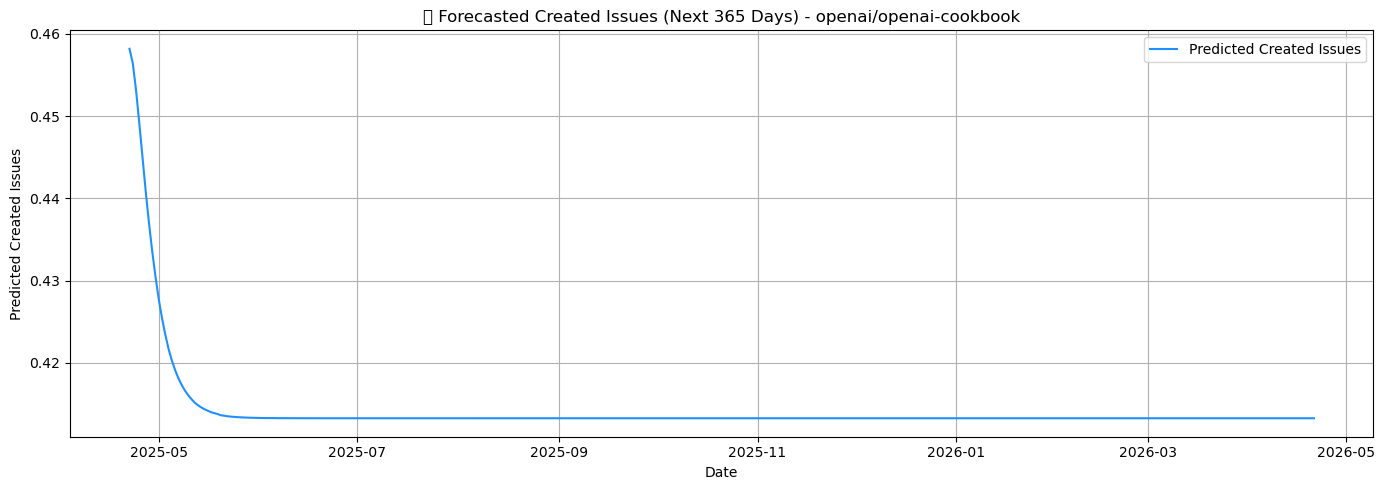

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting created issues for: elastic/elasticsearch


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


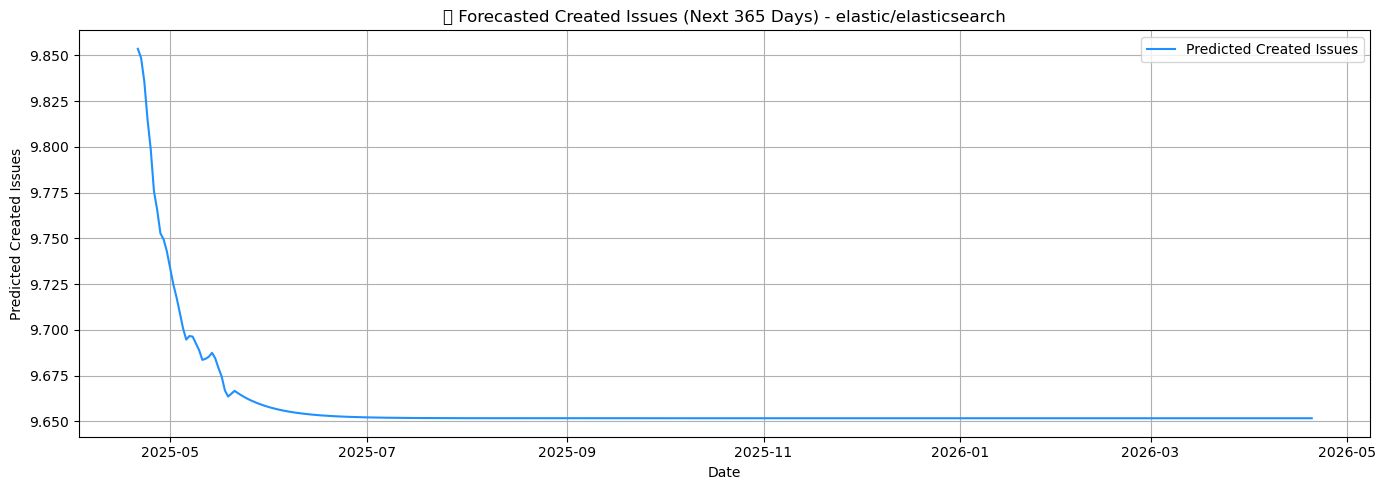

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting created issues for: milvus-io/pymilvus


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/3630451806.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


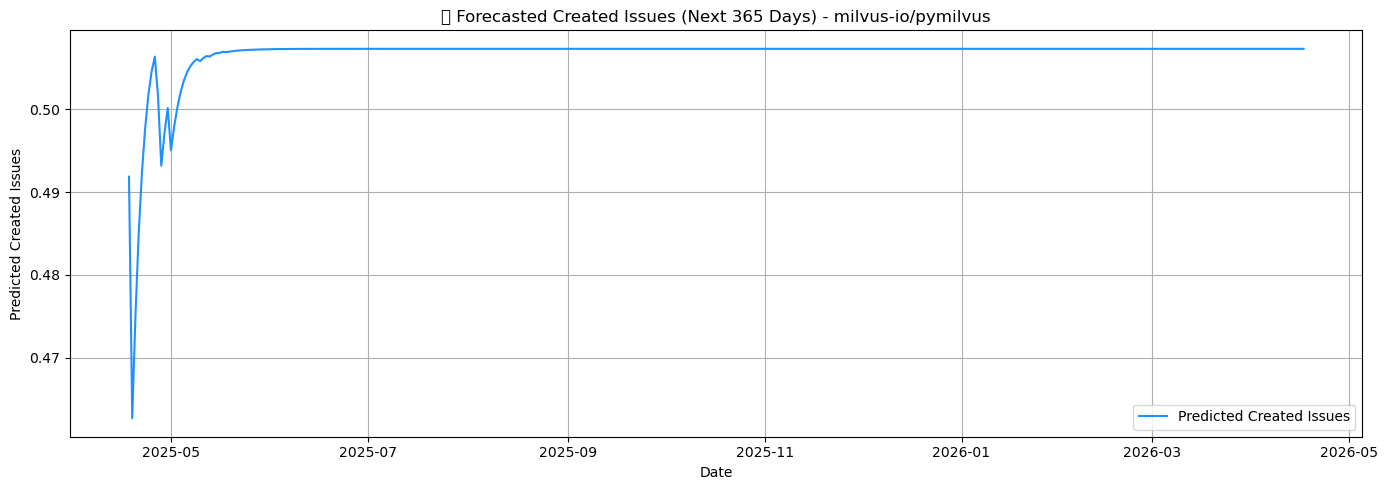

In [116]:
#Add your code for requirement 8.4 in this cell

# 📈 REQ8-4: Forecast future created issues and plot trend (daily)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

# 載入資料
df = pd.read_csv("issues_last_2_months.csv")
df["created_at"] = pd.to_datetime(df["created_at"])
df = df[df["created_at"].notna()]
df["repo"] = df["repo"].astype(str)

repo_names = df["repo"].unique()

for repo in repo_names:
    print(f"\n🔮 Forecasting created issues for: {repo}")
    
    # 每日 created 數據
    repo_df = df[df["repo"] == repo]
    daily_created = repo_df.groupby(repo_df["created_at"].dt.date).size()
    daily_created = daily_created.reindex(
        pd.date_range(daily_created.index.min(), daily_created.index.max()),
        fill_value=0
    )
    daily_created.index.name = "date"
    
    # 正規化
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily_created.values.reshape(-1, 1))

    # 準備 LSTM 訓練資料
    lookback = 30
    X, y = [], []
    for i in range(lookback, len(scaled)):
        X.append(scaled[i - lookback:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)

    # LSTM 模型
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=10, verbose=0)

    # 預測未來 365 天
    input_seq = scaled[-lookback:]
    predictions = []
    current_input = input_seq.reshape(1, lookback, 1)

    for _ in range(365):
        pred = model.predict(current_input, verbose=0)[0][0]
        predictions.append(pred)
        current_input = np.append(current_input[:, 1:, :], [[[pred]]], axis=1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # 建立未來日期序列
    future_dates = pd.date_range(daily_created.index[-1] + timedelta(days=1), periods=365)

    # 畫圖
    plt.figure(figsize=(14, 5))
    plt.plot(future_dates, predictions, color='dodgerblue', label="Predicted Created Issues")
    plt.title(f"📈 Forecasted Created Issues (Next 365 Days) - {repo}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Created Issues")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


<div class="alert alert-block alert-success">   
    
#### REQ8-5). Plot the closed issues forecast 

</div>


🔮 Forecasting closed issues for: meta-llama/llama3


/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


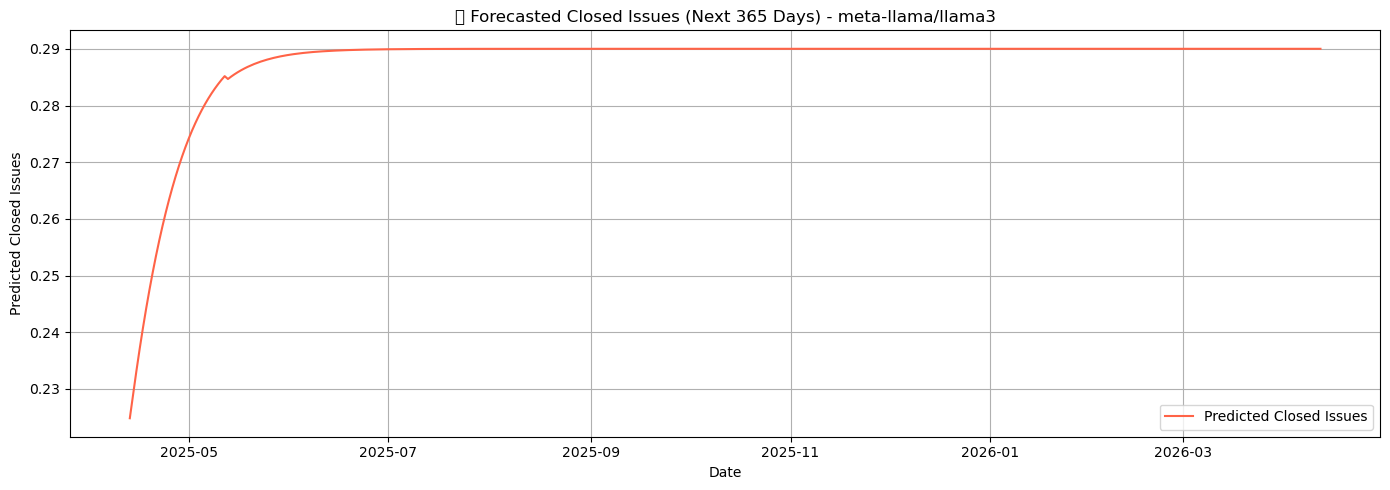

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting closed issues for: ollama/ollama


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


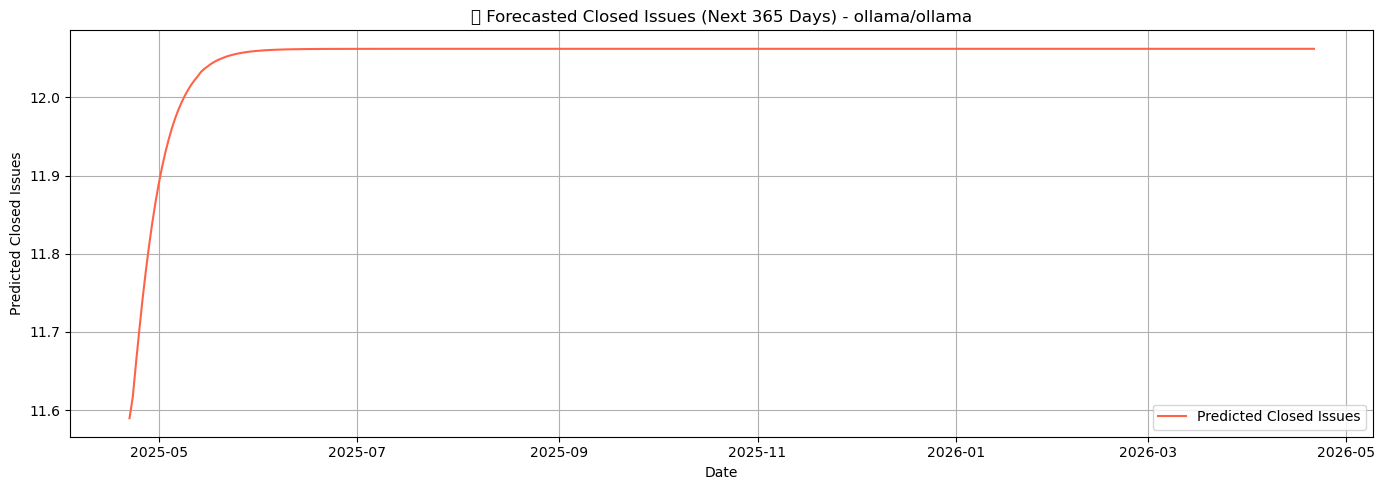

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting closed issues for: langchain-ai/langchain


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


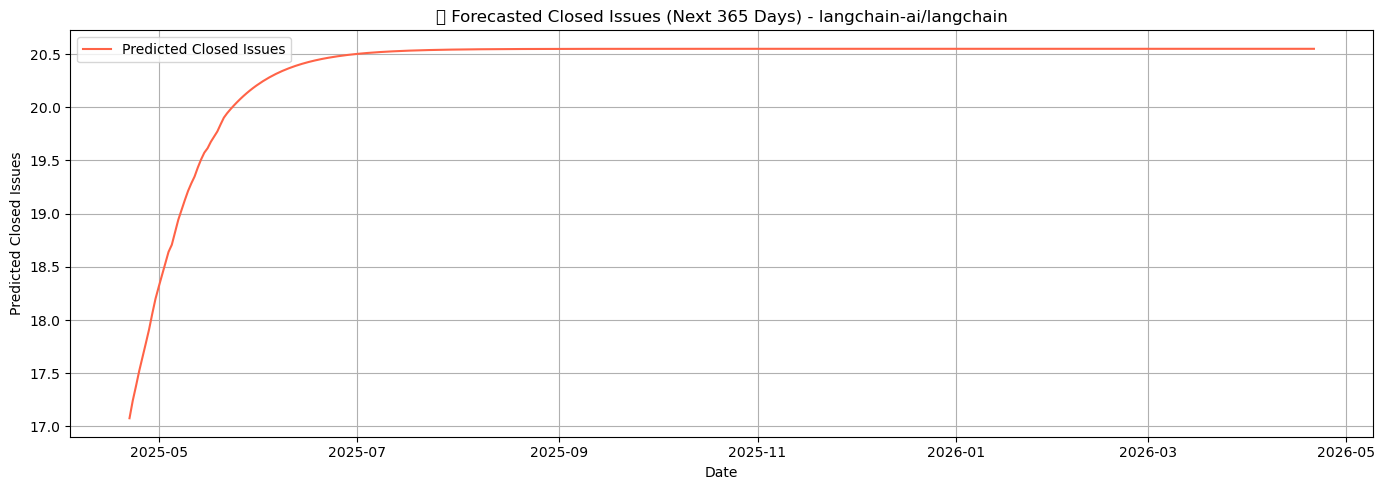

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting closed issues for: langchain-ai/langgraph


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


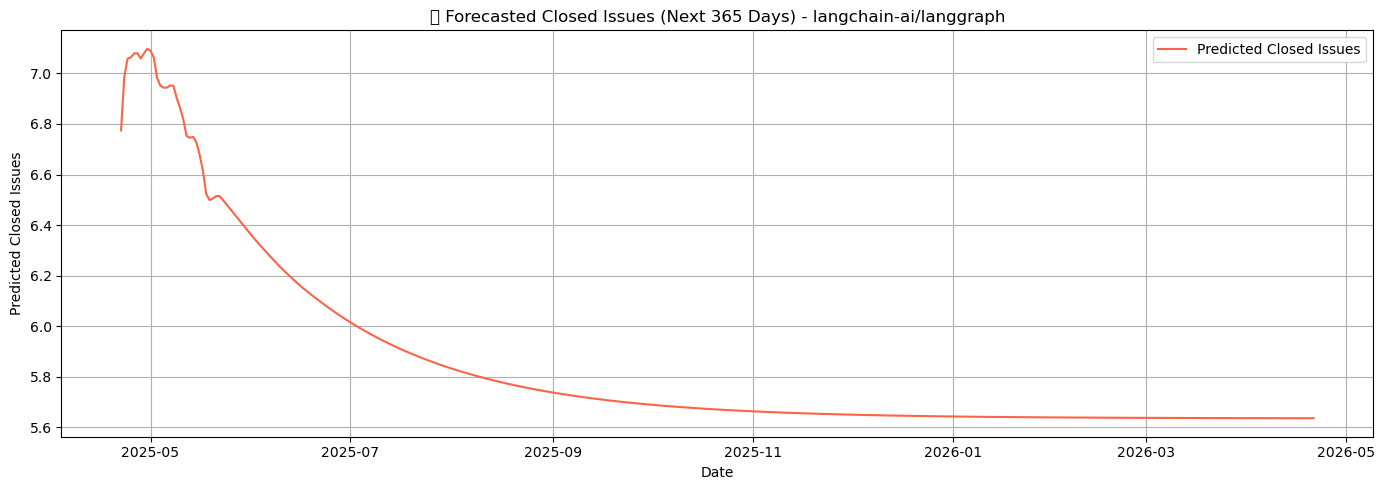

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting closed issues for: microsoft/autogen


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


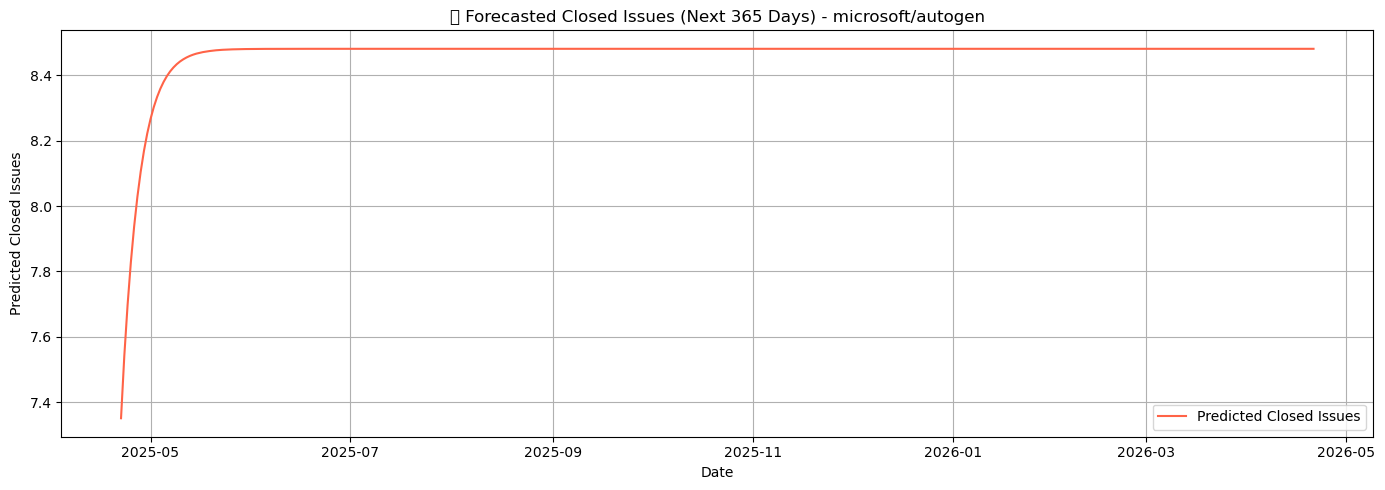

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting closed issues for: openai/openai-cookbook


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


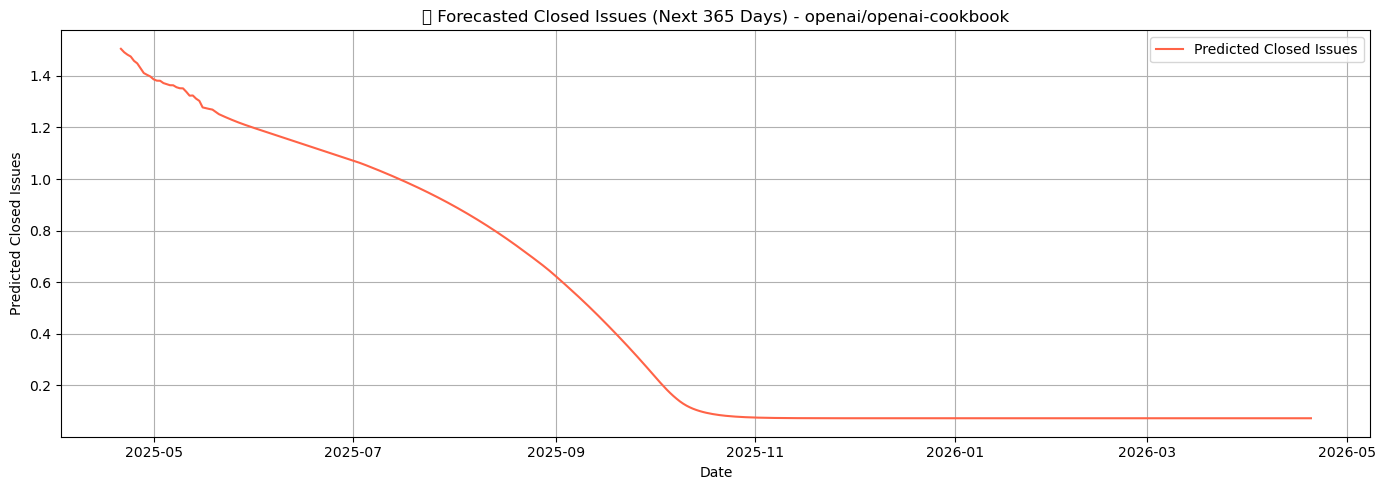

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting closed issues for: elastic/elasticsearch


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


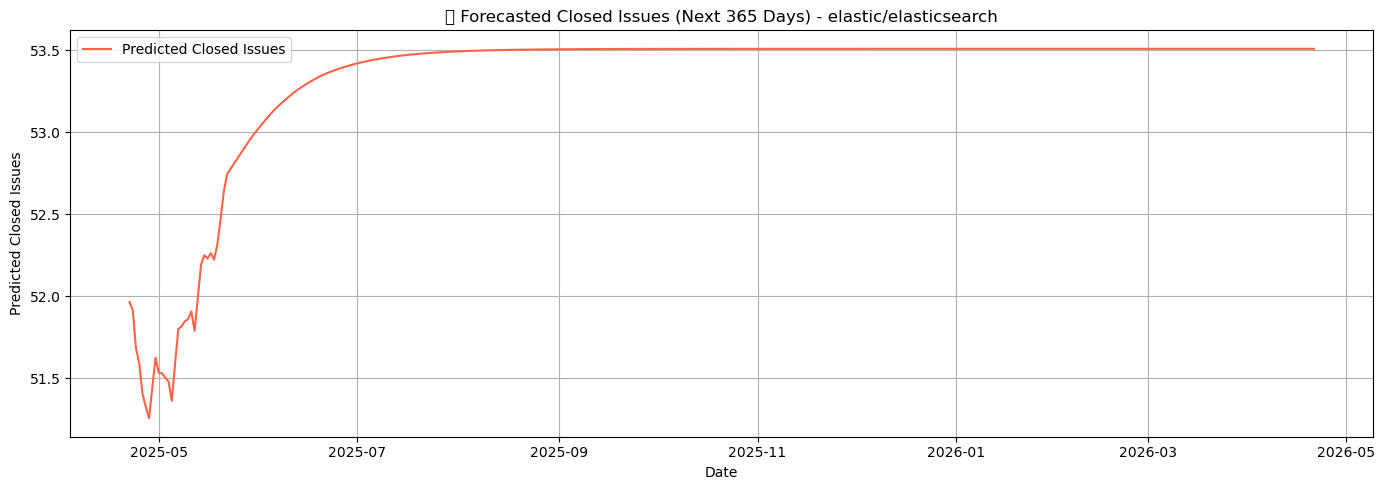

/Users/lohi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔮 Forecasting closed issues for: milvus-io/pymilvus


/var/folders/9r/wvblfhlx2pj_5fnn4rvs6j0r0000gn/T/ipykernel_10298/2589327101.py:74: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/lohi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


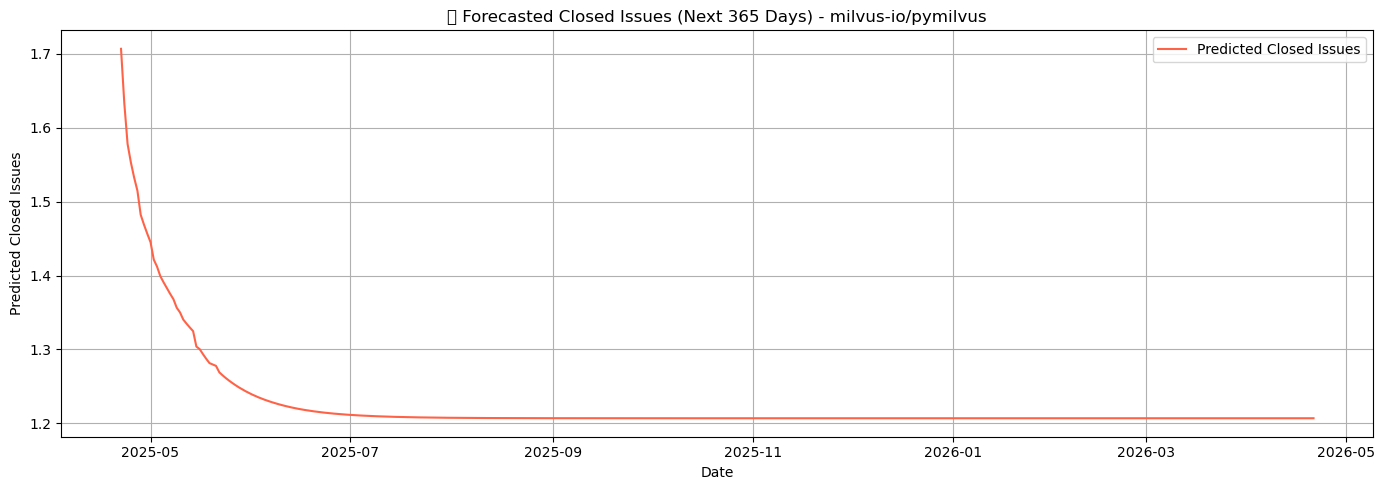

In [ ]:
#Add your code for requirement 8.5 in this cell

# 📉 REQ8-5: Forecast future closed issues and plot daily trend

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

# 載入資料
df = pd.read_csv("issues_last_2_months.csv")
df["closed_at"] = pd.to_datetime(df["closed_at"])
df = df[df["closed_at"].notna()]
df["repo"] = df["repo"].astype(str)

repo_names = df["repo"].unique()

for repo in repo_names:
    print(f"\n🔮 Forecasting closed issues for: {repo}")
    
    # 每日關閉統計
    repo_df = df[df["repo"] == repo]
    daily_closed = repo_df.groupby(repo_df["closed_at"].dt.date).size()
    daily_closed = daily_closed.reindex(
        pd.date_range(daily_closed.index.min(), daily_closed.index.max()),
        fill_value=0
    )
    daily_closed.index.name = "date"
    
    # 正規化
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily_closed.values.reshape(-1, 1))

    # LSTM 訓練資料（過去 30 天預測第 31 天）
    lookback = 30
    X, y = [], []
    for i in range(lookback, len(scaled)):
        X.append(scaled[i - lookback:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)

    # 建立模型
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=10, verbose=0)

    # 預測未來 365 天
    input_seq = scaled[-lookback:]
    predictions = []
    current_input = input_seq.reshape(1, lookback, 1)

    for _ in range(365):
        pred = model.predict(current_input, verbose=0)[0][0]
        predictions.append(pred)
        current_input = np.append(current_input[:, 1:, :], [[[pred]]], axis=1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # 生成預測日期
    future_dates = pd.date_range(daily_closed.index[-1] + timedelta(days=1), periods=365)

    # 畫圖
    plt.figure(figsize=(14, 5))
    plt.plot(future_dates, predictions, color='tomato', label="Predicted Closed Issues")
    plt.title(f"📉 Forecasted Closed Issues (Next 365 Days) - {repo}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Closed Issues")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


<div class="alert alert-block alert-success">   
    
#### REQ8-6). Plot the pulls forecast 

</div>

In [ ]:
#Add your code for requirement 8.6 in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

# 載入資料（需包含 PR 標記欄位）
df = pd.read_csv("issues_last_2_months.csv")
df["created_at"] = pd.to_datetime(df["created_at"])
df["repo"] = df["repo"].astype(str)

# 這裡只選出 PR（在原始 API 抓下時記得保留 pull_request 欄位為 True）
if "pull_request" not in df.columns:
    print("⚠️ Warning: No 'pull_request' column found. This data may not include PR info.")
    df["is_pr"] = False  # fallback：無法區分時跳過
else:
    df["is_pr"] = df["pull_request"].notna()

# 過濾出 PR
df_pr = df[df["is_pr"]]

repo_names = df_pr["repo"].unique()

for repo in repo_names:
    print(f"\n🔮 Forecasting pull requests for: {repo}")
    
    repo_df = df_pr[df_pr["repo"] == repo]
    daily_pr = repo_df.groupby(repo_df["created_at"].dt.date).size()
    daily_pr = daily_pr.reindex(
        pd.date_range(daily_pr.index.min(), daily_pr.index.max()),
        fill_value=0
    )
    daily_pr.index.name = "date"
    
    # 正規化
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily_pr.values.reshape(-1, 1))

    # LSTM 訓練資料
    lookback = 30
    X, y = [], []
    for i in range(lookback, len(scaled)):
        X.append(scaled[i - lookback:i])
        y.append(scaled[i])
    X, y = np.array(X), np.array(y)

    # LSTM 模型
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=10, verbose=0)

    # 預測未來 365 天
    input_seq = scaled[-lookback:]
    predictions = []
    current_input = input_seq.reshape(1, lookback, 1)

    for _ in range(365):
        pred = model.predict(current_input, verbose=0)[0][0]
        predictions.append(pred)
        current_input = np.append(current_input[:, 1:, :], [[[pred]]], axis=1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # 建立預測日期
    future_dates = pd.date_range(daily_pr.index[-1] + timedelta(days=1), periods=365)

    # 畫圖
    plt.figure(figsize=(14, 5))
    plt.plot(future_dates, predictions, color='mediumorchid', label="Predicted Pull Requests")
    plt.title(f"🔮 Forecasted Pull Requests (Next 365 Days) - {repo}")
    plt.xlabel("Date")
    plt.ylabel("Predicted PR Count")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


⚠️ Warning: No 'pull_request' column found. This data may not include PR info.


<div class="alert alert-block alert-success">   
    
#### REQ8-7). Plot the commits forecast

</div>

In [59]:
#Add your code for requirement 8.7 in this cell

<div class="alert alert-block alert-success">   
    
#### REQ8-8). Plot the branches forecast

</div>

In [60]:
#Add your code for requirement 8.8 in this cell

<div class="alert alert-block alert-success">   
    
#### REQ8-9). Plot the contributors forecast

</div>

In [61]:
#Add your code for requirement 8.9 in this cell

<div class="alert alert-block alert-success">   
    
#### REQ8-10). Plot the releases forecast

</div>

In [62]:
#Add your code for requirement 8.10 in this cell

<hr style="border:1px solid black"> </hr>
<div class="alert alert-info">   
    
## REQUIREMENT 9 (FACEBOOK/PROPHET)
- Use Facebook/Prophet package to forecast the following for every repository
    
</div>

<div class="alert alert-block alert-warning">   
    
#### REQ9-1). The day of the week maximum number of issues created 
    
</div>

In [63]:
#Add your code for requirement 9.1 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-2). The day of the week maximum number of issues closed 

</div>

In [64]:
#Add your code for requirement 9.2 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-3). The month of the year that has maximum number of issues closed 


</div>

In [65]:
#Add your code for requirement 9.3 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-4). Plot the created issues forecast 

</div>

In [66]:
#Add your code for requirement 9.4 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-5). Plot the closed issues forecast 

</div>

In [67]:
#Add your code for requirement 9.5 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-6). Plot the pulls forecast 

</div>

In [68]:
#Add your code for requirement 9.6 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-7). Plot the commits forecast

</div>

In [69]:
#Add your code for requirement 9.7 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-8). Plot the branches forecast

</div>

In [70]:
#Add your code for requirement 9.8 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-9). Plot the contributors forecast

</div>

In [71]:
#Add your code for requirement 9.9 in this cell

<div class="alert alert-block alert-warning">   
    
#### REQ9-10). Plot the releases forecast

</div>

In [72]:
#Add your code for requirement 9.10 in this cell

<hr style="border:1px solid black"> </hr>
<div class="alert alert-info">   
    
## REQUIREMENT 10 (STATSMODEL)
- Use StatsModel package to forecast the following for every repository
    
</div>

<div class="alert alert-block alert-danger">   
    
#### REQ10-1). The day of the week maximum number of issues created 
    
</div>

In [73]:
#Add your code for requirement 10.1 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-2). The day of the week maximum number of issues closed 

</div>

In [74]:
#Add your code for requirement 10.2 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-3). The month of the year that has maximum number of issues closed 


</div>

In [75]:
#Add your code for requirement 10.3 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-4). Plot the created issues forecast 

</div>

In [76]:
#Add your code for requirement 10.4 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-5). Plot the closed issues forecast 

</div>

In [77]:
#Add your code for requirement 10.5 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-6). Plot the pulls forecast 

</div>

In [78]:
#Add your code for requirement 10.6 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-7). Plot the commits forecast

</div>

In [79]:
#Add your code for requirement 10.7 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-8). Plot the branches forecast

</div>

In [80]:
#Add your code for requirement 10.8 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-9). Plot the contributors forecast

</div>

In [81]:
#Add your code for requirement 10.9 in this cell

<div class="alert alert-block alert-danger">   
    
#### REQ10-10). Plot the releases forecast

</div>

In [82]:
#Add your code for requirement 10.10 in this cell